# Looking for the violations
I want to find all the buys that higher than R$ 8000. This is the cap set by Brazilian bidding law: after this point, all the expenses should go through a full bidding proccess, with a few exceptional cases.

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
pd.set_option('display.float_format', '{:,.2f}'.format)

In [3]:
df = pd.read_csv('CPGF_2010_to_2017_july.csv',encoding='Latin5')

In [4]:
# The column with the value, 'Valor Transação', is currently a str. I need to make it into a float.
df['Valor Transação'] = df['Valor Transação'].str.replace(',','.')
df['Valor Transação'] = df['Valor Transação'].astype(float)

In [5]:
# I discovered that there are six instances of dates that are in the year 2010. They should be in 2010.
# I'll fix that.
df['Data Transação'] = df['Data Transação'].str.replace('/2000','/2010')

In [6]:
#I'll also make the 'Data Transação' column behave as an actual date
df['Data Transação'] = pd.to_datetime(df['Data Transação'], dayfirst=True,format='%d/%m/%Y',errors='coerce')

In [7]:
df.dtypes

Código Órgão Superior                int64
Nome Órgão Superior                 object
Código Órgão Subordinado             int64
Nome Órgão Subordinado              object
Código Unidade Gestora               int64
Nome Unidade Gestora                object
Ano Extrato                          int64
Mês Extrato                          int64
CPF Portador                        object
Nome Portador                       object
Transação                           object
Data Transação              datetime64[ns]
CNPJ ou CPF Favorecido              object
Nome Favorecido                     object
Valor Transação                    float64
dtype: object

### First, some generic questions.


**1. Is the spending made with those cards increasing over time?**

In [8]:
# First, I'll creat a copy of the dataframe, just so I can easily revert changes if anything goes bad.
df2 = df.copy()

In [9]:
# I'll set date as the index
df2.set_index('Data Transação', inplace = True)

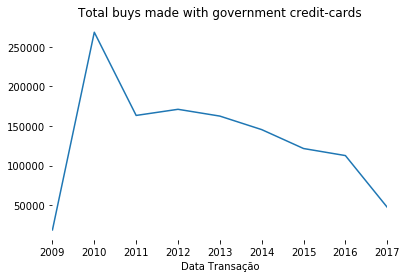

In [10]:
ax = df2.resample('A')['Transação'].count().plot()
ax.set_frame_on(False)
ax.set_title('Total buys made with government credit-cards')

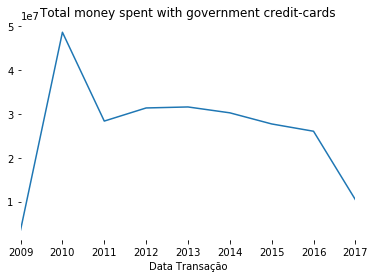

In [11]:
ax = df2.resample('A')['Valor Transação'].sum().plot()
ax.set_frame_on(False)
ax.set_title('Total money spent with government credit-cards')

The really rough increase from 2009 to 2010 is because only expenses made in december of 2009 are in the dataset.
The numbers started to fall after a news-scandal that broke in mid 2010, when top-level officials where spending load of money in frivolities.

**2. Who are the officials who spend the most?**

In [12]:
# Overall - this data is to broad and includes spending made before the 2010 scandal. I want a more recent picture.
df.groupby('Nome Portador').sum().sort_values(by='Valor Transação',ascending=False).head()

,Código Órgão Superior,Código Órgão Subordinado,Código Unidade Gestora,Ano Extrato,Mês Extrato,Valor Transação
Nome Portador,,,,,,
"Informações protegidas por sigilo, nos termos da legislação, para garantia da segurança da sociedade e do Estado",92262224,99131569,595330537,6363812,21073,"220,463,674.22"
MARIA FATIMA S SILV,15808818,37103130,90078744,1581999,6003,"633,248.28"
SIMIAO B PINHEIRO,63475000,63985339,439391723,5111866,16356,"546,946.03"
JOSE MAYER AMARAIM,78078000,78819741,459951492,6045740,20306,"530,822.55"
JOAO JUNIOR,11142602,26151570,63490616,1114813,3998,"513,459.92"


In [13]:
# I had to create a new column with the date in string format to filter things and create a DF for each year.
df['str_date'] = df['Data Transação'].astype(str)

In [14]:
# This year - sum
year_2017 = df[df['str_date'].str.startswith('2017')]
year_2017.groupby('Nome Portador').sum().sort_values(by='Valor Transação',ascending=False).head()

,Código Órgão Superior,Código Órgão Subordinado,Código Unidade Gestora,Ano Extrato,Mês Extrato,Valor Transação
Nome Portador,,,,,,
RICARDO VICENTE,20748000,20788299,44050398,804783,2212,"153,866.20"
HERMANO L A MACHADO,6725000,6752707,45753672,542573,1287,"117,924.02"
WILMAR F CASTRO,5148000,5235714,30714750,399366,996,"45,015.03"
SIMIAO B PINHEIRO,4025000,4057361,27862177,324737,711,"44,724.49"
PAULO H G DE CASTRO,1224000,1254634,8738170,68578,190,"39,148.64"


In [15]:
# This year - buy counts
year_2017.groupby('Nome Portador').count().sort_values(by='Valor Transação',ascending=False).head()

,Código Órgão Superior,Nome Órgão Superior,Código Órgão Subordinado,Nome Órgão Subordinado,Código Unidade Gestora,Nome Unidade Gestora,Ano Extrato,Mês Extrato,CPF Portador,Transação,Data Transação,CNPJ ou CPF Favorecido,Nome Favorecido,Valor Transação,str_date
Nome Portador,,,,,,,,,,,,,,,
RICARDO VICENTE,399,399,399,399,399,399,399,399,399,399,399,399,399,399,399
HERMANO L A MACHADO,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269
WILMAR F CASTRO,198,198,198,198,198,198,198,198,198,198,198,178,180,198,198
ORLANDINO J SILVA,173,173,173,173,173,173,173,173,173,173,173,146,171,173,173
DORMEVIL B JUNIOR,171,171,171,171,171,171,171,171,171,171,171,144,165,171,171


In [16]:
# Last year - sum
year_2016 = df[df['str_date'].str.startswith('2016')]
year_2016 .groupby('Nome Portador').sum().sort_values(by='Valor Transação',ascending=False).head()

,Código Órgão Superior,Código Órgão Subordinado,Código Unidade Gestora,Ano Extrato,Mês Extrato,Valor Transação
Nome Portador,,,,,,
RICARDO VICENTE,52832000,52934616,112168432,2048267,6811,"342,362.60"
HERMANO L A MACHADO,9975000,10016097,67865112,804399,2666,"174,775.70"
WILMAR F CASTRO,14144000,14384992,84388000,1096756,3887,"130,568.42"
ROSANE MARLI DIESEL,11440000,11634920,68255000,887078,3092,"123,078.53"
SIMIAO B PINHEIRO,8125000,8190325,56243525,655222,2228,"85,336.82"


In [17]:
# Last year - buy counts
year_2016.groupby('Nome Portador').count().sort_values(by='Valor Transação',ascending=False).head()

,Código Órgão Superior,Nome Órgão Superior,Código Órgão Subordinado,Nome Órgão Subordinado,Código Unidade Gestora,Nome Unidade Gestora,Ano Extrato,Mês Extrato,CPF Portador,Transação,Data Transação,CNPJ ou CPF Favorecido,Nome Favorecido,Valor Transação,str_date
Nome Portador,,,,,,,,,,,,,,,
RICARDO VICENTE,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016
WILMAR F CASTRO,544,544,544,544,544,544,544,544,544,544,544,503,503,544,544
ROSANE MARLI DIESEL,440,440,440,440,440,440,440,440,440,440,440,409,411,440,440
HERMANO L A MACHADO,399,399,399,399,399,399,399,399,399,399,399,399,399,399,399
JOSE MAYER AMARAIM,332,332,332,332,332,332,332,332,332,332,332,276,276,332,332


Most of this guys are buying plane tickets, probably centralizing all the buys for their agencies.

### But who is actually receiving this money?

In [18]:
# Since 2010
df.groupby('Nome Favorecido').sum().sort_values(by='Valor Transação',ascending=False) 

,Código Órgão Superior,Código Órgão Subordinado,Código Unidade Gestora,Ano Extrato,Mês Extrato,Valor Transação
Nome Favorecido,,,,,,
"Informações protegidas por sigilo, nos termos da legislação, para garantia da segurança da sociedade e do Estado",92262224,99131569,595330537,6363812,21073,"220,463,674.22"
KALUNGA COMERCIO E INDUSTRIA GRAFICA LTDA,157703725,201218113,1069538343,10975197,39579,"1,000,409.82"
AZUL LINHAS AEREAS BRASILEIRAS S.A.,52864226,53447400,289107673,3479469,12027,"874,234.05"
GOL LINHAS AEREAS S.A.,43936000,44742675,174958605,2234016,6899,"514,664.40"
OCEANAIR LINHAS AEREAS S/A [AVIANCA],51689000,52509660,231605339,2529937,8321,"494,794.23"
OLIVEIRA E CINTRA LTDA. [FARMACIA POPULAR],24444000,24741139,173609233,1365435,4051,"480,114.00"
COMERCIAL DE MEDICAMENTOS SAO FRANCISCO LTDA EPP,34560000,34898490,245216230,1930343,6639,"456,010.60"
TAM LINHAS AEREAS S/A. [LATAM AIRLINES BRASIL],32728000,33012208,134655625,1729987,4990,"427,294.95"
UNIVERSO ONLINE S/A [DIVISAO UOL],36114645,43645722,221468015,2388524,8759,"402,612.47"


In [19]:
# 2017
year_2017.groupby('Nome Favorecido').sum().sort_values(by='Valor Transação',ascending=False) 

,Código Órgão Superior,Código Órgão Subordinado,Código Unidade Gestora,Ano Extrato,Mês Extrato,Valor Transação
Nome Favorecido,,,,,,
AZUL LINHAS AEREAS BRASILEIRAS S.A.,10851000,10917984,66711842,786630,1901,"189,803.65"
GOL LINHAS AEREAS S.A.,8842000,8975084,41603798,506267,1268,"134,999.13"
TAM LINHAS AEREAS S/A. [LATAM AIRLINES BRASIL],8295000,8378522,41057046,492148,1216,"119,706.86"
OCEANAIR LINHAS AEREAS S/A [AVIANCA],13422000,13501374,38796544,592998,1566,"110,408.23"
PAGSEGURO INTERNET LTDA,9840797,12574284,62904312,738222,1973,"92,113.69"
KALUNGA COMERCIO E INDUSTRIA GRAFICA LTDA,8927362,12155613,65134208,647457,1582,"51,729.20"
ANA BEATRIZ DE FRAGA FERREIRA - ME [FERRAGEM PARATI],2412000,2426070,24522201,135139,297,"44,299.25"
MERCADOPAGO,2350791,2791315,15360123,151275,390,"31,558.10"
PRO ELETRO COMERCIAL LTDA,1188000,1194930,12078099,66561,175,"22,606.40"


In [20]:
# 2016
year_2016.groupby('Nome Favorecido').sum().sort_values(by='Valor Transação',ascending=False)

,Código Órgão Superior,Código Órgão Subordinado,Código Unidade Gestora,Ano Extrato,Mês Extrato,Valor Transação
Nome Favorecido,,,,,,
AZUL LINHAS AEREAS BRASILEIRAS S.A.,27959226,28295759,144016871,1768068,6433,"419,242.59"
GOL LINHAS AEREAS S.A.,33754000,34422810,128883887,1663237,5599,"366,357.78"
TAM LINHAS AEREAS S/A. [LATAM AIRLINES BRASIL],21391000,21580937,84784545,1106799,3708,"268,098.91"
OCEANAIR LINHAS AEREAS S/A [AVIANCA],28798000,28958091,136029716,1328548,4395,"247,983.97"
UNIVERSO ONLINE S/A [DIVISAO UOL],20775978,24800248,125768790,1395089,4893,"245,712.60"
KALUNGA COMERCIO E INDUSTRIA GRAFICA LTDA,19522967,25728268,123184246,1324569,4855,"127,788.77"
PAGSEGURO INTERNET S.A.,6499938,7407987,42283325,435465,2019,"83,471.44"
PONTO TREZE COMERCIO E SERVICOS EIRELI - EPP,2860000,2886655,8817018,110880,497,"78,738.30"
MECANICA NOVA WGD LTDA - ME,832000,833936,2566539,32256,157,"71,958.44"


In [21]:
year_2017.groupby(['Nome Favorecido','Nome Portador']).sum().sort_values(by='Valor Transação',ascending=False)

Código Órgão Superior  \
Nome Favorecido                                    Nome Portador                                
OCEANAIR LINHAS AEREAS S/A [AVIANCA]               RICARDO VICENTE                   11336000   
AZUL LINHAS AEREAS BRASILEIRAS S.A.                HERMANO L A MACHADO                3325000   
GOL LINHAS AEREAS S.A.                             RICARDO VICENTE                    4264000   
TAM LINHAS AEREAS S/A. [LATAM AIRLINES BRASIL]     HERMANO L A MACHADO                2025000   
                                                   RICARDO VICENTE                    3380000   
GOL LINHAS AEREAS S.A.                             HERMANO L A MACHADO                1375000   
                                                   PAULO H G DE CASTRO                 540000   
AZUL LINHAS AEREAS BRASILEIRAS S.A.                MARCIO T BIASOLI                    528000   
AUTO POSTO ESTONIA 3 LTDA.                         VALMIR M SILVA                      500000   
ANA BEATRIZ DE FRAGA FERREIRA - ME [FERRAGEM PA... JOAO ADOIR DE FRAGA                 720000   
AZUL LINHAS AEREAS BRASILEIRAS S.A.                ROSILANE M NUNES PE                 850000   
                                                   ROSINEIDE ATAIDES                  1125000   
TAM LINHAS AEREAS S/A. [LATAM AIRLINES BRASIL]     PAULO H G DE CASTRO                 432000   
AZUL LINHAS AEREAS BRASILEIRAS S.A.                PAULO RENATO SOUTO                  725000   
                                                   RICARDO VICENTE                    1768000   
GOL LINHAS AEREAS S.A.                             ROSINEIDE ATAIDES                   400000   
URCA SUL SUPERMERCADOS LTDA - EPP                  CARLOS WANDERLEY                    736000   
M MARAES DO NASCIMENTO - ME [AUTO POSTO CARAUARI]  JOSE MAGALHAES                      281582   
CITY EXPERTS                                       FERNANDA P CAMILO                    52000   
DAMASCO MATERIAL ELETRICO HIDRAULICO E FERRAGEN... SIMIAO B PINHEIRO                   550000   
ELETRICA CATARINENSE LTDA - ME                     ELOI FERNANDO GOMES                 624000   
MAP TRANSPORTES AEREOS LTDA [MAP LINHAS AEREAS]    RAIMUNDA F VIANA                    338000   
FARMACIA ALIANCA LTDA - EPP [ALIANCA]              RODRIGO GARCIA                      648000   
AZUL LINHAS AEREAS BRASILEIRAS S.A.                SORINES BRUNETTO                    416000   
MAOS A OBRA REPAROS                                CRISTINA LEMOS                       44000   
AZUL LINHAS AEREAS BRASILEIRAS S.A.                LUCIO A COSTA                        52000   
SERODIA PROJETOS E CONSTRUCOES LTDA - ME [VIGIO]   SOLANGE BRANDOLINI                  104000   
ULISSES C.RANGEL MATERIAL DE CONSTRUCAO EM GERA... ALEXANDRE H B ARAUJ                  52000   
ANA BEATRIZ DE FRAGA FERREIRA - ME [FERRAGEM PA... EDUARDO DOS SANTOS                  396000   
SUPERMERCADO NORDESTAO LTDA                        ERIKA P S FREITAS                   624000   
...                                                                                       ...   
F J P SUPRIMENTOS PARA INFORMATICA LTDA [F J P ... VICENTE LEAO JUNIOR                  22000   
TERWAL MAQUINAS LTDA [TERWAL]                      ANTONIO S SAMPAIO                    25000   
F. J. BEDIN - ME [MORIA CONVENIENCIA E RESTAURA... TEN BERNARDI                         52000   
COMERCIAL SONORA LTDA - EPP [SONORA]               ELISANIA ARNDT                       26000   
J. A. CEBALHO DA SILVA EIRELI  - ME [DROGARIA A... KATIA S RIBEIRO                      26000   
DROGARIAS PACHECO S/A [DROGARIA PACHECO]           CHRISTIANE CIAFRINO                  36000   
ENTROPAY-009072                                    JOSE O DA COSTA                      20000   
VIA EXPRESSA CONVENIEN                             JULIANO A CONCEICAO                  52000   
ABADIO E FREIRE LTDA - ME [POSTO SATURNO]          SERGIO ANT RIBEIRO                   26000  

### Are the 'secret' credit card expenses growing?
The previous yearly databases don't show the confidential expenses beacuse those rows don't have an actual date. Nevertheless, we can do an close-enough estimate of a temporal series using the fields 'ano extrato' and 'mês extrato' - the year and month where the billing for that buy was registered in the system.

In [22]:
confidential = df[df['CPF Portador'] == 'Informações protegidas por sigilo, nos termos da legislação, para garantia da segurança da sociedade e do Estado']

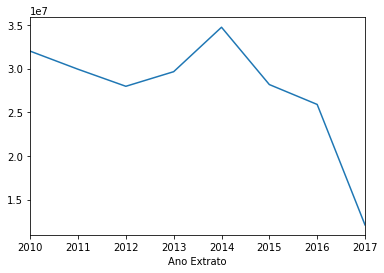

In [23]:
confidential.groupby('Ano Extrato')['Valor Transação'].sum().plot()

There is a decreasing trend, but that was expected, since Brazil faces recession and government spending is going down quickly. But what about measuring secret expenses as a % of total expenses?

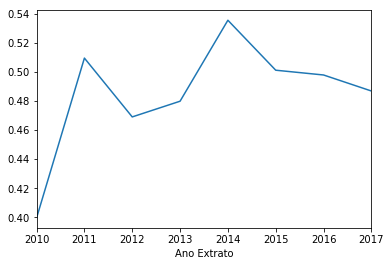

In [24]:
(confidential.groupby('Ano Extrato')['Valor Transação'].sum() / df.groupby('Ano Extrato')['Valor Transação'].sum()).plot()

Hm, slightly decreasing, but still more than HALF of the expenses!

In [25]:
# But what agencies are spending money confidentially?
confidential.groupby('Nome Órgão Subordinado')['Valor Transação'].sum().sort_values(ascending=False)

Nome Órgão Subordinado
AGENCIA BRASILEIRA DE INTELIGENCIA - ABIN       63,883,569.62
DEPARTAMENTO DE POLICIA FEDERAL                 56,462,539.08
PRESIDENCIA DA REPUBLICA                        55,969,796.42
FUNDO P/APAR. E OPERAC. ATIV.-FIM POL.FEDERAL   38,426,242.97
GABINETE DA VICE-PRESIDENCIA DA REPUBLICA        4,215,217.90
RECEITA FEDERAL DO BRASIL                        1,005,805.00
FUNDO CONSTITUCIONAL DO DISTRITO FEDERAL-FCDF      367,040.80
COMANDO DA AERONAUTICA                             118,732.56
COMANDO DO EXERCITO                                 14,729.87
Name: Valor Transação, dtype: float64

Intelligence agencies, the Federal Police, the army... fair enough, I guess. But the President and Vice-President offices?
Hm, more questionable. And Brazil had a president change in 2016. Maybe the secret spending under direct supervision of the President office changed?

In [26]:
confidential[confidential['Nome Órgão Subordinado'] == 'PRESIDENCIA DA REPUBLICA'].groupby('Ano Extrato')['Valor Transação'].sum() / df[df['Nome Órgão Subordinado'] == 'PRESIDENCIA DA REPUBLICA'].groupby('Ano Extrato')['Valor Transação'].sum() 

Ano Extrato
2010   1.00
2011   0.99
2012   0.99
2013   0.99
2014   0.99
2015   0.99
2016   0.99
2017   0.98
Name: Valor Transação, dtype: float64

In [27]:
confidential[confidential['Nome Órgão Subordinado'] == 'PRESIDENCIA DA REPUBLICA']['Valor Transação'].sum() / df[df['Nome Órgão Subordinado'] == 'PRESIDENCIA DA REPUBLICA']['Valor Transação'].sum()

0.9910191057265744

In [28]:
confidential[confidential['Nome Órgão Subordinado'] == 'GABINETE DA VICE-PRESIDENCIA DA REPUBLICA']['Valor Transação'].sum() / df[df['Nome Órgão Subordinado'] == 'GABINETE DA VICE-PRESIDENCIA DA REPUBLICA']['Valor Transação'].sum()

0.9714571534767392

There was a slight drop, but almost 100% of the spending made by the presiden office is secret. Is this justifiable?

### Cash withdrawals
Another way of making the money untraceable is doing cash withdrawals. How much was withdrawed directly from ATMs?

In [29]:
df[df['Transação'].str.contains('SAQUE')].shape

(194728, 16)

In [30]:
df[df['Transação'].str.contains('SAQUE')]['Valor Transação'].sum()

60358882.959999934

In [31]:
df[df['Transação'].str.contains('SAQUE')].groupby('Nome Órgão Subordinado')['Valor Transação'].sum().sort_values(ascending=False)

Nome Órgão Subordinado
FUNDACAO INST.BRAS.DE GEOGRAFIA E ESTATISTICA   34,963,553.00
INSTITUTO NAC. DE COLONIZACAO E REF. AGRARIA     5,029,694.00
INST.CHICO MENDES DE CONSER.DA BIODIVERSIDADE    2,364,329.00
MINISTERIO DA AGRIC.PECUARIA E ABASTECIMENTO     2,038,887.42
EMPRESA BRASILEIRA DE PESQUISA AGROPECUARIA      1,618,034.00
FUNDACAO NACIONAL DE SAUDE                       1,364,934.00
COMANDO DO EXERCITO                              1,105,806.00
MINISTERIO DA FAZENDA                              905,133.00
INDUSTRIA DE MATERIAL BELICO DO BRASIL-IMBEL       725,411.65
COMANDO DA AERONAUTICA                             703,298.00
RECEITA FEDERAL DO BRASIL                          626,166.00
EMPRESA BRASIL DE COMUNICACAO                      527,931.70
BANCO CENTRAL DO BRASIL                            475,511.00
UNIVERSIDADE FEDERAL DE SANTA MARIA                426,038.00
FUNDO DE AMPARO AO TRABALHADOR                     423,917.00
COMPANHIA NACIONAL DE ABASTECIMENTO            

#### Total sum of untraceable money

In [32]:
saque = df[df['Transação'].str.contains('SAQUE')]

In [33]:
saque['Valor Transação'].sum() + confidential['Valor Transação'].sum()

280822557.18000025

In [34]:
saque['Valor Transação'].sum() + confidential['Valor Transação'].sum() / df['Valor Transação'].sum()

60358883.44112954

#### Total sum of untraceable money over time -- in % of total

In [35]:
(pd.concat([saque,confidential]).groupby('Ano Extrato')['Valor Transação'].sum()) / df.groupby('Ano Extrato')['Valor Transação'].sum()

Ano Extrato
2010   0.62
2011   0.60
2012   0.59
2013   0.60
2014   0.64
2015   0.62
2016   0.62
2017   0.61
Name: Valor Transação, dtype: float64

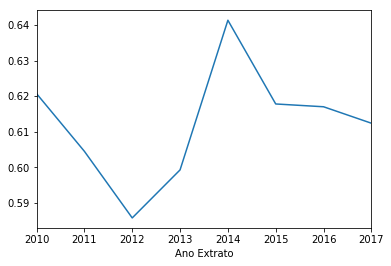

In [36]:
((pd.concat([saque,confidential]).groupby('Ano Extrato')['Valor Transação'].sum()) / df.groupby('Ano Extrato')['Valor Transação'].sum()).plot()

### Bidding law
Now let's look at all the buys that went over the R$ 8000 cap.

In [37]:
# Over 8000 is a dataframe with all the transactions that may have violated the bidding laws.
over_8000 = df[df['Valor Transação'] > 8000]

In [38]:
over_8000.shape

(2297, 16)

It turns out that, since 2010, there were 2296 buys that exceeded the R$ 8000 cap. Who were the people and agencies responsible for those?


In [39]:
# Who were the actual people responsible for allvthis buys?
over_8000['Nome Portador'].value_counts()

Informações protegidas por sigilo, nos termos da legislação, para garantia da segurança da sociedade e do Estado    2277
FERNANDA P CAMILO                                                                                                      3
TER SGT PANSANI                                                                                                        3
PILLMANN                                                                                                               2
HILTON                                                                                                                 2
VALDECIR MEURER JR                                                                                                     1
GUSTAVO RECHE                                                                                                          1
TELIO F DA SILVA                                                                                                       1
BRUNO G DA SILVA                

Interesting: 2277 of this buys are deemed confidential.
The other 20 are traceable, though... But only sort of.
Some of the responsibles are identified by generic names such as "Third Seargent Pansani", "Pillman", "Hilton" and "Seargent Josias".


Anyway, we are able too see which agencies were responsible for the over-the-cap spending.

In [40]:
# What are the agencies responsible for all this buys?
over_8000['Nome Órgão Subordinado'].value_counts()

DEPARTAMENTO DE POLICIA FEDERAL                  1074
FUNDO P/APAR. E OPERAC. ATIV.-FIM POL.FEDERAL     819
PRESIDENCIA DA REPUBLICA                          153
GABINETE DA VICE-PRESIDENCIA DA REPUBLICA          86
AGENCIA BRASILEIRA DE INTELIGENCIA - ABIN          77
RECEITA FEDERAL DO BRASIL                          56
FUNDO CONSTITUCIONAL DO DISTRITO FEDERAL-FCDF      15
COMANDO DO EXERCITO                                12
EPU - REC. SOB SUPERVISAO DO MIN. AERONAUTICA       3
INDUSTRIA DE MATERIAL BELICO DO BRASIL-IMBEL        1
MINISTERIO DA DEFESA                                1
Name: Nome Órgão Subordinado, dtype: int64

Among them, there are some agencies whose confidential buys that might be justifiable: the Federal Police, the Brazilian Intelligence Agency, the Ministry of Defense, the Air Force... But the President and Vice-President offices are on the list as well.

Anyway, let's look closely at the buys we can follow.

In [41]:
# All the buys over the cap that are not under 
over_8000[over_8000['Nome Portador'] != 'Informações protegidas por sigilo, nos termos da legislação, para garantia da segurança da sociedade e do Estado']

,Código Órgão Superior,Nome Órgão Superior,Código Órgão Subordinado,Nome Órgão Subordinado,Código Unidade Gestora,Nome Unidade Gestora,Ano Extrato,Mês Extrato,CPF Portador,Nome Portador,Transação,Data Transação,CNPJ ou CPF Favorecido,Nome Favorecido,Valor Transação,str_date
454310,20000,PRESIDENCIA DA REPUBLICA,20102,GABINETE DA VICE-PRESIDENCIA DA REPUBLICA,110101,GABINETE DA VICE-PRESIDENCIA DA REPUBLICA,2012,3,***.292.70*-**,GUSTAVO RECHE,COMPRA A/V - R$ - APRES,2012-02-22,***.425.29*-**,GOLDEN TOWER HOTEIS E TURISMO LTDA,"8,253.00",2012-02-22
509146,52000,MINISTERIO DA DEFESA,52101,MINISTERIO DA DEFESA,110404,DEPARTAMENTO DE ADMINISTRACAO INTERNA-MD,2012,6,***.673.74*-**,TELIO F DA SILVA,COMPRA A/V - R$ - APRES,2012-05-24,***.363.19*-**,NOVA RIOTEL EMPREENDIMENTOS HOTELEIROS LTDA,"26,944.50",2012-05-24
833737,52000,MINISTERIO DA DEFESA,52221,INDUSTRIA DE MATERIAL BELICO DO BRASIL-IMBEL,168007,INDUSTRIA DE MATERIAL BELICO DO BRASIL/FMCE,2014,6,***.177.79*-**,JOZIEL M C JUNIOR,COMPRA A/V - INT$ - APRES,2014-04-28,NaN,NaN,"9,522.21",2014-04-28
858072,52000,MINISTERIO DA DEFESA,52121,COMANDO DO EXERCITO,160098,BASE ADMINISTRATIVA DA BDA DE OP ESPECIAIS,2014,8,***.557.68*-**,JULIO CESAR MACEDO,COMPRA A/V - R$ - APRES,2014-07-12,09606396000190,AMANDMAR COMERCIO DE PRODUTOS DE INFORMATICA E...,"8,900.00",2014-07-12
858565,52000,MINISTERIO DA DEFESA,52121,COMANDO DO EXERCITO,160410,4 BATALHAO LOGISTICO,2014,8,***.679.17*-**,PILLMANN,COMPRA A/V - R$ - APRES,2014-06-27,30853378000107,PONTO TREZE COMERCIO E SERVICOS EIRELI - EPP,"16,882.00",2014-06-27
872950,52000,MINISTERIO DA DEFESA,52121,COMANDO DO EXERCITO,160410,4 BATALHAO LOGISTICO,2014,9,***.679.17*-**,PILLMANN,COMPRA A/V - R$ - APRES,2014-07-30,14159188000120,TEC MAIA REFRIGERACAO LTDA - EPP,"18,879.60",2014-07-30
944312,25000,MINISTERIO DA FAZENDA,73901,FUNDO CONSTITUCIONAL DO DISTRITO FEDERAL-FCDF,170394,FCDF±SSP±CORPO BOMBEIRO MILITAR DO DF,2015,4,***.304.20*-**,MARCUS T S MENEZES,COMPRA A/V - R$ - APRES,2015-03-25,11893055000194,CONSTRUCEL MATERIAIS DE CONSTRUCAO LTDA - ME [...,"14,921.45",2015-03-25
960953,52000,MINISTERIO DA DEFESA,52121,COMANDO DO EXERCITO,160340,16 BATALHAO DE INFANTARIA MOTORIZADO,2015,5,***.710.65*-**,TER SGT PANSANI,COMPRA A/V - R$ - APRES,2015-04-08,35881333000151,SUPERDELLI ATACADO E SUPERMERCADO S. A. [SUPER...,"9,769.50",2015-04-08
960959,52000,MINISTERIO DA DEFESA,52121,COMANDO DO EXERCITO,160340,16 BATALHAO DE INFANTARIA MOTORIZADO,2015,5,***.710.65*-**,TER SGT PANSANI,COMPRA A/V - R$ - APRES,2015-04-10,35881333000151,SUPERDELLI ATACADO E SUPERMERCADO S. A. [SUPER...,"8,454.78",2015-04-10
960961,52000,MINISTERIO DA DEFESA,52121,COMANDO DO EXERCITO,160340,16 BATALHAO DE INFANTARIA MOTORIZADO,2015,5,***.710.65*-**,TER SGT PANSANI,COMPRA A/V - R$ - APRES,2015-04-13,35881333000151,SUPERDELLI ATACADO E SUPERMERCADO S. A. [SUPER...,"9,872.24",2015-04-13


### Fractioning expenses
A common trick to break bidding laws in Brazil is called 'fracionamento': instead of making a single buy, agencies will pay for the same good over the time, in smaller payments that fall over the cap. Maybe I can detect those?

In [42]:
# What are the companies that received payments above R$ 8000 from a single source in less than one month?


### Are there any other people that answer only by their first names?


In [43]:
#def get_len_name(row):
#    len_name = len(str(row['Nome Favorecido']).split())
#    return pd.Series({'len_name':len_name})

In [44]:
#df.apply(get_len_name,axis=1)

### Crazy expenses
There are some crazy expenses there, like a general who spend R$ 15.000 in a barbecue house. How much of our money is going to barbcuers????

In [45]:
# Let's search for barbecue houses, bars and all sort of things officials SHOULD NOT be spending money on.

In [46]:
# First, make the establishment names lowercase, so it's easier to match strings
df2['Nome Favorecido'] = df2['Nome Favorecido'].str.lower()
# Filling nans for easier string matching
df2['Nome Favorecido'].fillna('Unkwnown',inplace=True)

In [47]:
# Churrasco is a df with all the buys made in BARBECUE HOUSES.
churrasco = df2[df2['Nome Favorecido'].str.contains('churrasc')]
# Bar is 
bar = df2[df2['Nome Favorecido'].str.contains('\sbar\s',regex=True)]

In [48]:
churrasco.shape

(4911, 14)

In [49]:
# Who is buying barbecue?
churrasco.groupby('Nome Órgão Subordinado')['Valor Transação'].sum().sort_values(ascending=False)

Nome Órgão Subordinado
COMANDO DO EXERCITO                             765,866.21
FUNDO DO EXERCITO                               138,707.58
MINISTERIO DA DEFESA                            128,514.99
EPU - REC. SOB SUPERVISAO DO MIN. AERONAUTICA    60,382.00
INST.FED.DE EDUC.,CIENC.E TEC.DO PARA            10,402.10
INSTITUTO NAC. DE COLONIZACAO E REF. AGRARIA      9,887.77
MINISTERIO DA AGRIC.PECUARIA E ABASTECIMENTO      9,666.75
AGENCIA ESPACIAL BRASILEIRA - AEB                 8,861.50
INST. NACIONAL DE COLONIZ. E REFORMA AGRARIA      8,373.42
MINISTERIO DO TRABALHO                            7,759.56
FUNDACAO INST.BRAS.DE GEOGRAFIA E ESTATISTICA     6,796.99
COMPANHIA DE PESQUISA DE RECURSOS MINERAIS        5,468.42
COMISSAO NACIONAL DE ENERGIA NUCLEAR - CNEN       4,967.46
UNIVERSIDADE FEDERAL RURAL DO RIO DE JANEIRO      4,258.21
COMANDO DA MARINHA                                3,376.60
DEPARTAMENTO NACIONAL DE PRODUCAO MINERAL         2,311.91
UNIVERSIDADE FEDERAL DE ITAJUBA -

In [50]:
churrasco.groupby('Nome Favorecido')['Valor Transação'].sum().sort_values(ascending=False)

Nome Favorecido
restaurante e churrascaria serra da graciosa ltda - me [parada do japonez]                         70,327.22
rps bar e restaurante ltda [churrascaria porcao]                                                   56,243.61
churrascaria fogo de chao ltda. [fogo de chao]                                                     44,392.34
churrascaria caminho do sul ltda - epp                                                             35,144.58
restaurante e churrascaria 477 ltda - me                                                           30,891.60
fabiano ongaratto epp [churrascaria gramadao]                                                      19,202.60
barrigao restaurante e churrascaria ltda - epp [restaurante e lanchonete barrigao]                 17,256.08
ponto restaurante e churrascaria ltda - epp [grill hall panoramico]                                15,086.97
posto planalto comercio de combustivel ltda epp - epp [posto e churrascaria planalto]              11,312.67
v. 

In [51]:
churrasco[churrasco['Nome Favorecido'] == 'churrascaria fogo de chao ltda. [fogo de chao]']

,Código Órgão Superior,Nome Órgão Superior,Código Órgão Subordinado,Nome Órgão Subordinado,Código Unidade Gestora,Nome Unidade Gestora,Ano Extrato,Mês Extrato,CPF Portador,Nome Portador,Transação,CNPJ ou CPF Favorecido,Nome Favorecido,Valor Transação
Data Transação,,,,,,,,,,,,,,
2009-12-13,26000,MINISTERIO DA EDUCACAO,26294,HOSPITAL DE CLINICAS DE PORTO ALEGRE,155001,HOSPITAL DE CLINICAS DE PORTO ALEGRE,2010,1,***.216.93*-**,SERGIO F ZIRBES,COMPRA A/V - VISA-REAL-APRES,***.988.59*-**,churrascaria fogo de chao ltda. [fogo de chao],98.45
2009-12-13,26000,MINISTERIO DA EDUCACAO,26294,HOSPITAL DE CLINICAS DE PORTO ALEGRE,155001,HOSPITAL DE CLINICAS DE PORTO ALEGRE,2010,1,***.624.85*-**,MARIA L F MALVEZZI,COMPRA A/V - VISA-REAL-APRES,***.988.59*-**,churrascaria fogo de chao ltda. [fogo de chao],98.45
2010-03-16,26000,MINISTERIO DA EDUCACAO,26294,HOSPITAL DE CLINICAS DE PORTO ALEGRE,155001,HOSPITAL DE CLINICAS DE PORTO ALEGRE,2010,4,***.473.47*-**,AMARILIO V M NETO,COMPRA A/V - VISA-REAL-APRES,***.988.59*-**,churrascaria fogo de chao ltda. [fogo de chao],53.00
2010-03-16,26000,MINISTERIO DA EDUCACAO,26294,HOSPITAL DE CLINICAS DE PORTO ALEGRE,155001,HOSPITAL DE CLINICAS DE PORTO ALEGRE,2010,4,***.941.81*-**,TANIRA A T PINTO,COMPRA A/V - VISA-REAL-APRES,***.988.59*-**,churrascaria fogo de chao ltda. [fogo de chao],53.00
2011-09-12,52000,MINISTERIO DA DEFESA,52101,MINISTERIO DA DEFESA,110404,DEPARTAMENTO DE ADMINISTRACAO INTERNA-MD,2011,10,***.539.05*-**,ALOISIO D COSTA,COMPRA A/V - R$ - APRES,***.988.59*-**,churrascaria fogo de chao ltda. [fogo de chao],"1,738.22"
2011-09-25,52000,MINISTERIO DA DEFESA,52101,MINISTERIO DA DEFESA,110404,DEPARTAMENTO DE ADMINISTRACAO INTERNA-MD,2011,10,***.548.00*-**,ILTON JOSE VIEIRA,COMPRA A/V - R$ - APRES,***.988.59*-**,churrascaria fogo de chao ltda. [fogo de chao],"2,848.23"
2012-01-24,26000,MINISTERIO DA EDUCACAO,26294,HOSPITAL DE CLINICAS DE PORTO ALEGRE,155001,HOSPITAL DE CLINICAS DE PORTO ALEGRE,2012,2,***.116.29*-**,SERGIO P RIBEIRO,COMPRA A/V - R$ - APRES,***.988.59*-**,churrascaria fogo de chao ltda. [fogo de chao],64.78
2012-01-23,52000,MINISTERIO DA DEFESA,52101,MINISTERIO DA DEFESA,110404,DEPARTAMENTO DE ADMINISTRACAO INTERNA-MD,2012,2,***.132.39*-**,BRENO B JUNIOR,COMPRA A/V - R$ - APRES,***.988.59*-**,churrascaria fogo de chao ltda. [fogo de chao],"1,603.91"
2012-05-23,52000,MINISTERIO DA DEFESA,52101,MINISTERIO DA DEFESA,110404,DEPARTAMENTO DE ADMINISTRACAO INTERNA-MD,2012,6,***.673.74*-**,TELIO F DA SILVA,COMPRA A/V - R$ - APRES,***.988.59*-**,churrascaria fogo de chao ltda. [fogo de chao],996.16


In [52]:
# A agency made various buys in a beer delivery service
disk_cerveja = df2[df2['CNPJ ou CPF Favorecido'] == '03694641000181']

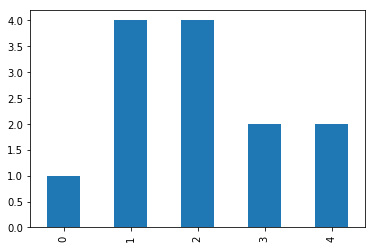

In [53]:
disk_cerveja.groupby(disk_cerveja.index.weekday).count()['Transação'].plot(kind='bar')

In [54]:
churrasco.sort_values(by='Valor Transação',ascending=False)

,Código Órgão Superior,Nome Órgão Superior,Código Órgão Subordinado,Nome Órgão Subordinado,Código Unidade Gestora,Nome Unidade Gestora,Ano Extrato,Mês Extrato,CPF Portador,Nome Portador,Transação,CNPJ ou CPF Favorecido,Nome Favorecido,Valor Transação
Data Transação,,,,,,,,,,,,,,
2016-08-31,52000,MINISTERIO DA DEFESA,72121,EPU - REC. SOB SUPERVISAO DO MIN. AERONAUTICA,160446,62 BATALHAO DE INFANTARIA,2016,10,***.757.37*-**,VALDECIR MEURER JR,COMPRA A/V - R$ - APRES,68365469000168,churrascaria caminho do sul ltda - epp,"15,088.20"
2016-09-21,52000,MINISTERIO DA DEFESA,72121,EPU - REC. SOB SUPERVISAO DO MIN. AERONAUTICA,160446,62 BATALHAO DE INFANTARIA,2016,10,***.077.52*-**,LUCAS T LIPIENSKI,COMPRA A/V - R$ - APRES,50536929000108,restaurante e churrascaria 477 ltda - me,"10,595.20"
2016-08-22,52000,MINISTERIO DA DEFESA,72121,EPU - REC. SOB SUPERVISAO DO MIN. AERONAUTICA,160446,62 BATALHAO DE INFANTARIA,2016,9,***.757.37*-**,VALDECIR MEURER JR,COMPRA A/V - R$ - APRES,68365469000168,churrascaria caminho do sul ltda - epp,"8,000.00"
2015-04-23,52000,MINISTERIO DA DEFESA,52101,MINISTERIO DA DEFESA,110404,DEPARTAMENTO DE ADMINISTRACAO INTERNA-MD,2015,5,***.076.58*-**,HALLEY F OLIVEIRA,COMPRA A/V - R$ - APRES,03956495000115,rps bar e restaurante ltda [churrascaria porcao],"7,847.40"
2012-05-07,52000,MINISTERIO DA DEFESA,52101,MINISTERIO DA DEFESA,110404,DEPARTAMENTO DE ADMINISTRACAO INTERNA-MD,2012,6,***.176.50*-**,EUDES C DOS SANTOS,COMPRA A/V - R$ - APRES,***.722.04*-**,juscelino grill churrascaria ltda. [juscelino ...,"6,168.10"
2011-09-30,52000,MINISTERIO DA DEFESA,52121,COMANDO DO EXERCITO,160512,20 REGIMENTO DE CAVALARIA BLINDADO,2011,11,***.227.56*-**,TEN SHIRADO,COMPRA A/V - R$ - APRES,***.477.74*-**,fabiano ongaratto epp [churrascaria gramadao],"6,122.50"
2014-09-04,52000,MINISTERIO DA DEFESA,52101,MINISTERIO DA DEFESA,110404,DEPARTAMENTO DE ADMINISTRACAO INTERNA-MD,2014,10,***.512.35*-**,ALVARO KOJI IMAI,COMPRA A/V - R$ - APRES,08698859000128,churrascaria fogo de chao ltda. [fogo de chao],"6,102.00"
2011-12-02,52000,MINISTERIO DA DEFESA,52121,COMANDO DO EXERCITO,160512,20 REGIMENTO DE CAVALARIA BLINDADO,2012,1,***.227.56*-**,TEN SHIRADO,COMPRA A/V - R$ - APRES,***.477.74*-**,fabiano ongaratto epp [churrascaria gramadao],"5,760.00"
2012-05-16,52000,MINISTERIO DA DEFESA,52101,MINISTERIO DA DEFESA,110404,DEPARTAMENTO DE ADMINISTRACAO INTERNA-MD,2012,6,***.132.39*-**,BRENO B JUNIOR,COMPRA A/V - R$ - APRES,***.249.51*-**,grupo coligrill churrascaria comercio e promoc...,"5,413.32"


## Pretty plots
Whar are all those findings worth of without visuals, though? LET'S DO THIS!

In [55]:
df.columns

Index(['Código Órgão Superior', 'Nome Órgão Superior',
       'Código Órgão Subordinado', 'Nome Órgão Subordinado',
       'Código Unidade Gestora', 'Nome Unidade Gestora', 'Ano Extrato',
       'Mês Extrato', 'CPF Portador', 'Nome Portador', 'Transação',
       'Data Transação', 'CNPJ ou CPF Favorecido', 'Nome Favorecido',
       'Valor Transação', 'str_date'],
      dtype='object')

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.rcParams['pdf.fonttype'] = 42
%matplotlib inline

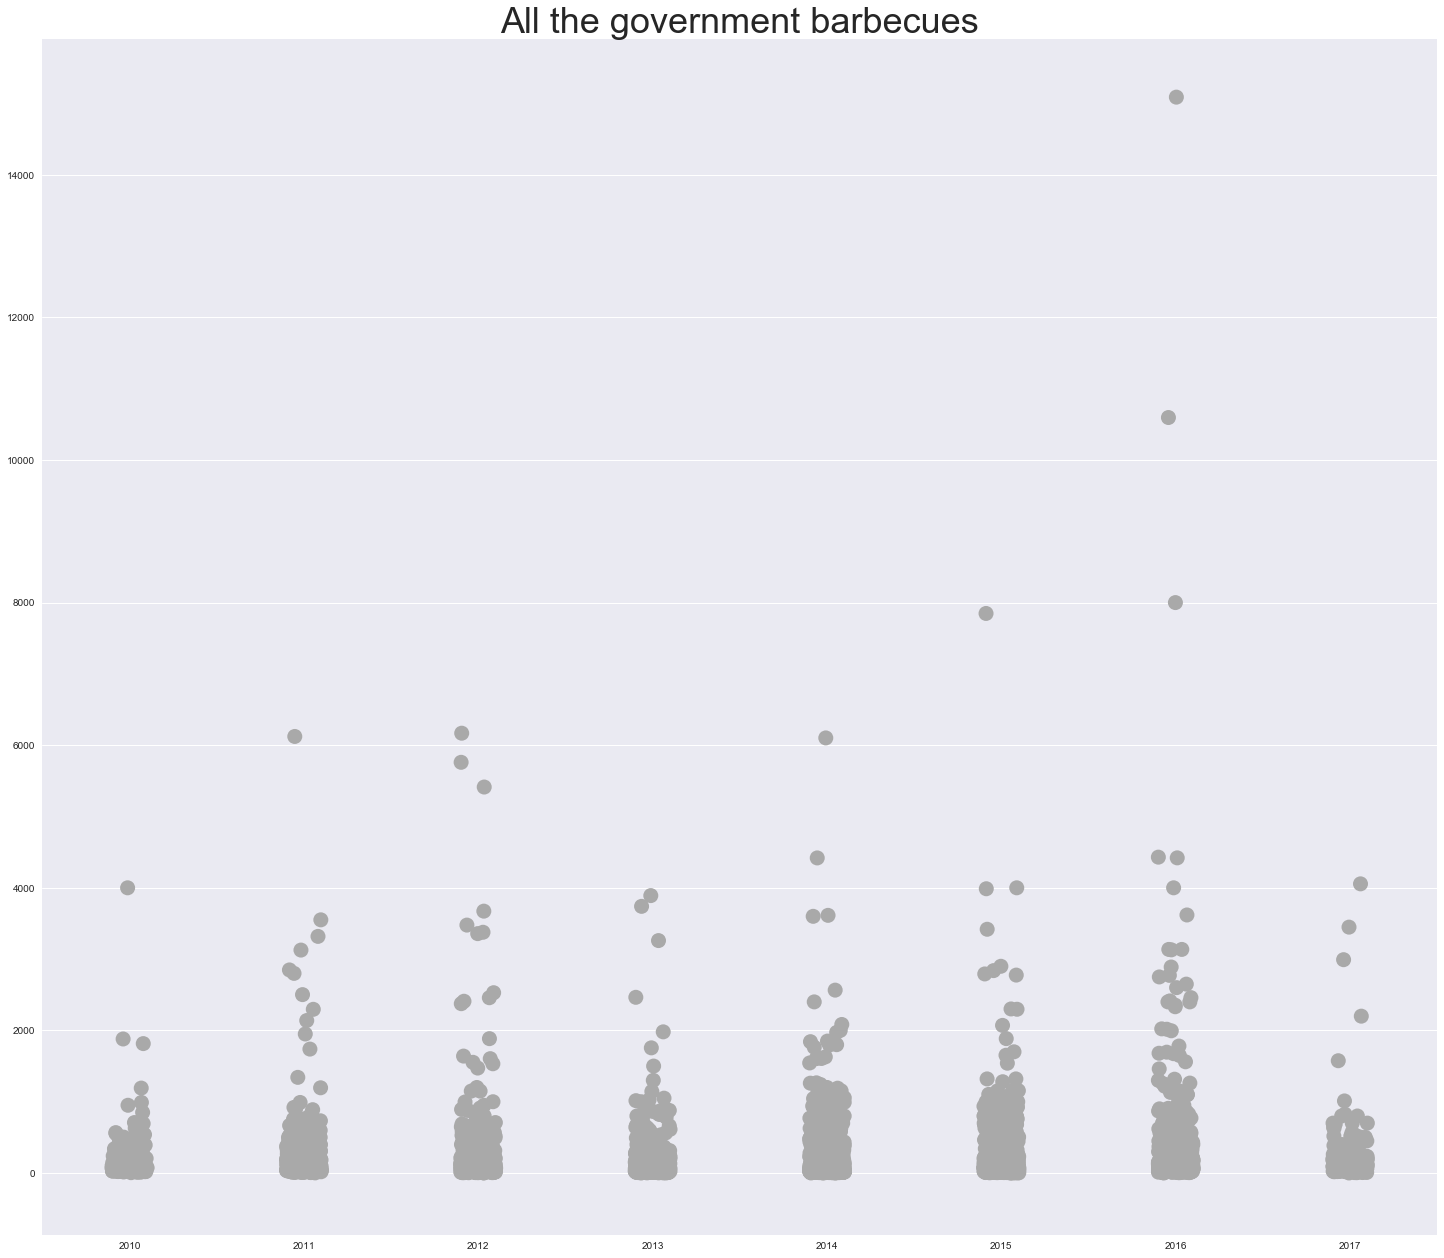

In [57]:
fig, ax = plt.subplots(figsize=(25,22))
sns.set(font_scale=3,style='white')
sns.stripplot('Ano Extrato', 'Valor Transação', data=churrasco,color='darkgray',size=15,jitter=True)
sns.despine(left=True, bottom=True, right=True)
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title('All the government barbecues')
plt.savefig('barbecues.pdf')

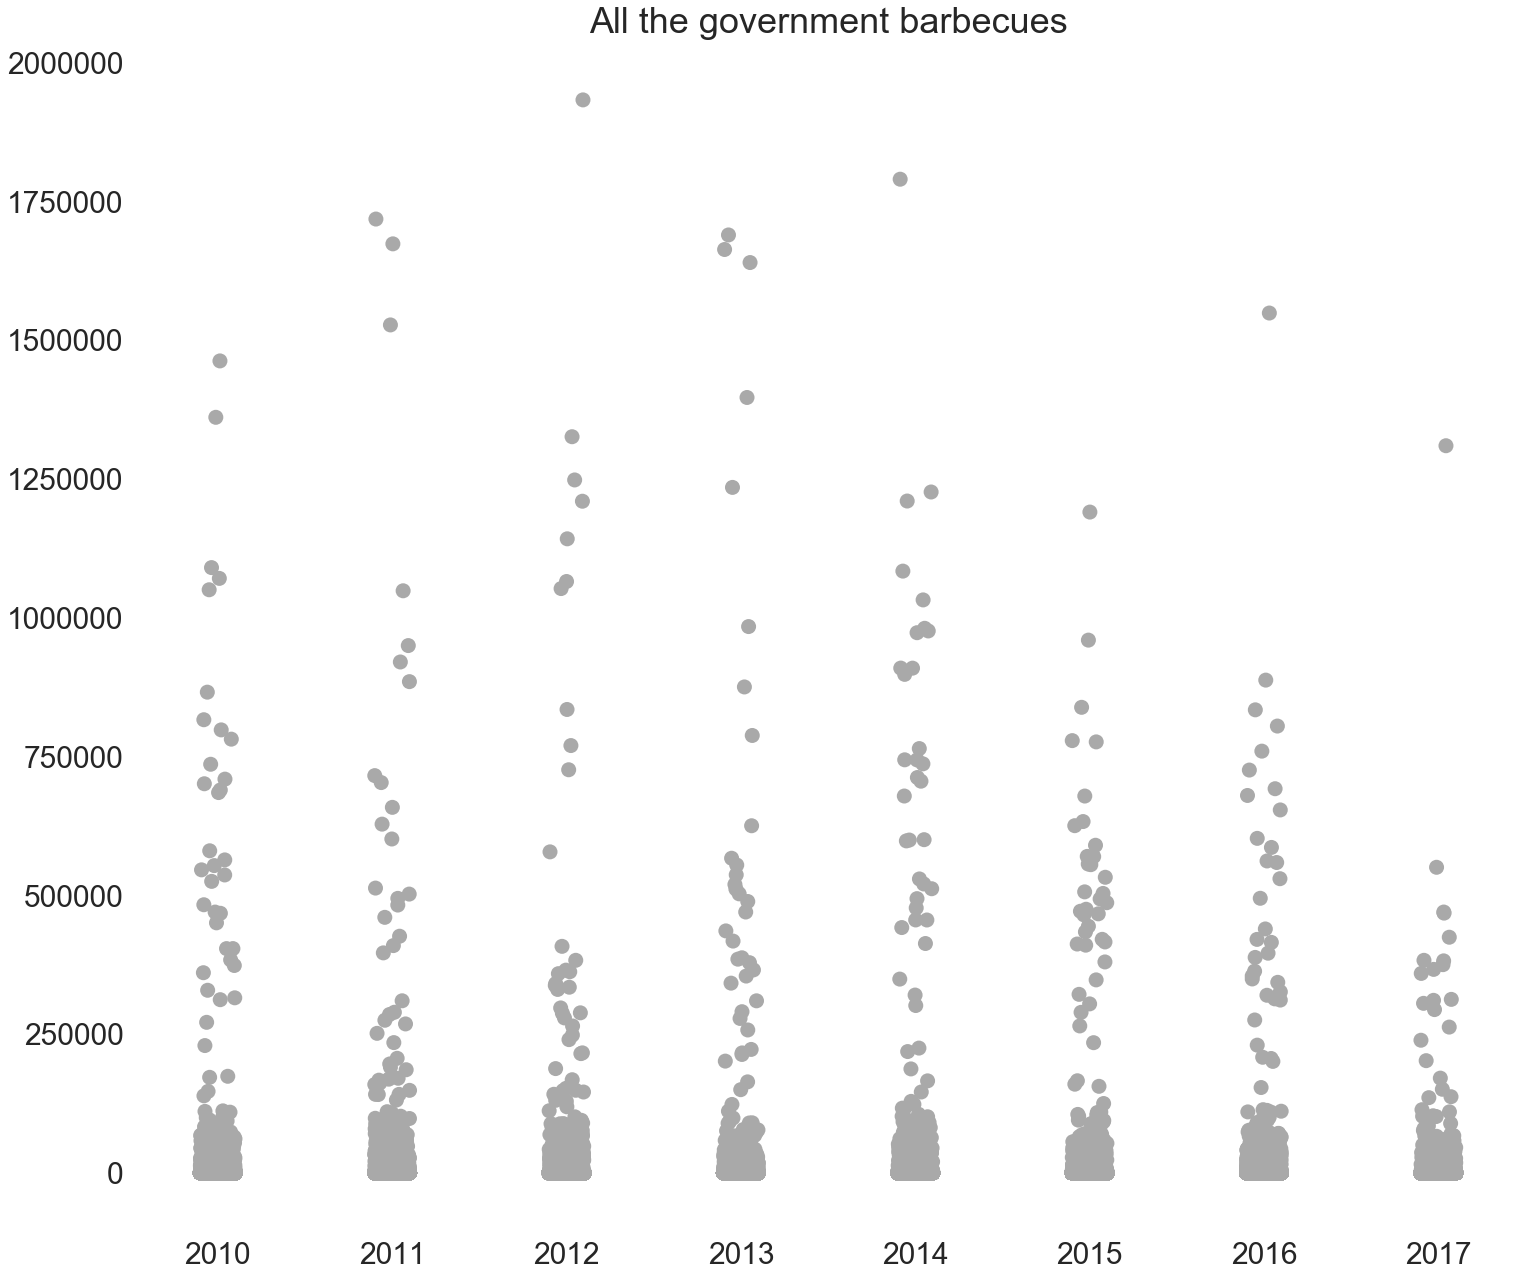

In [58]:
fig, ax = plt.subplots(figsize=(25,22))
sns.set(font_scale=3,style='white')
sns.stripplot('Ano Extrato', 'Valor Transação', data=df,color='darkgray',size=15,jitter=True)
sns.despine(left=True, bottom=True, right=True)
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title('All the government barbecues')
#plt.savefig('barbecues.pdf')

In [59]:
# I am defining a function to create a new category: whether the purchase is secret or not.
def get_confidentiality(row):
    if row['Nome Favorecido'] == 'Informações protegidas por sigilo, nos termos da legislação, para garantia da segurança da sociedade e do Estado':
        sigilo = 'Confidential'
    else:
        sigilo = 'Not confidential'
    return pd.Series({'sigilo':sigilo})

In [60]:
# I am applying that function to the dataframe with all the purchases over R$ 8000
over_8000 = over_8000.join(over_8000.apply(get_confidentiality,axis=1))

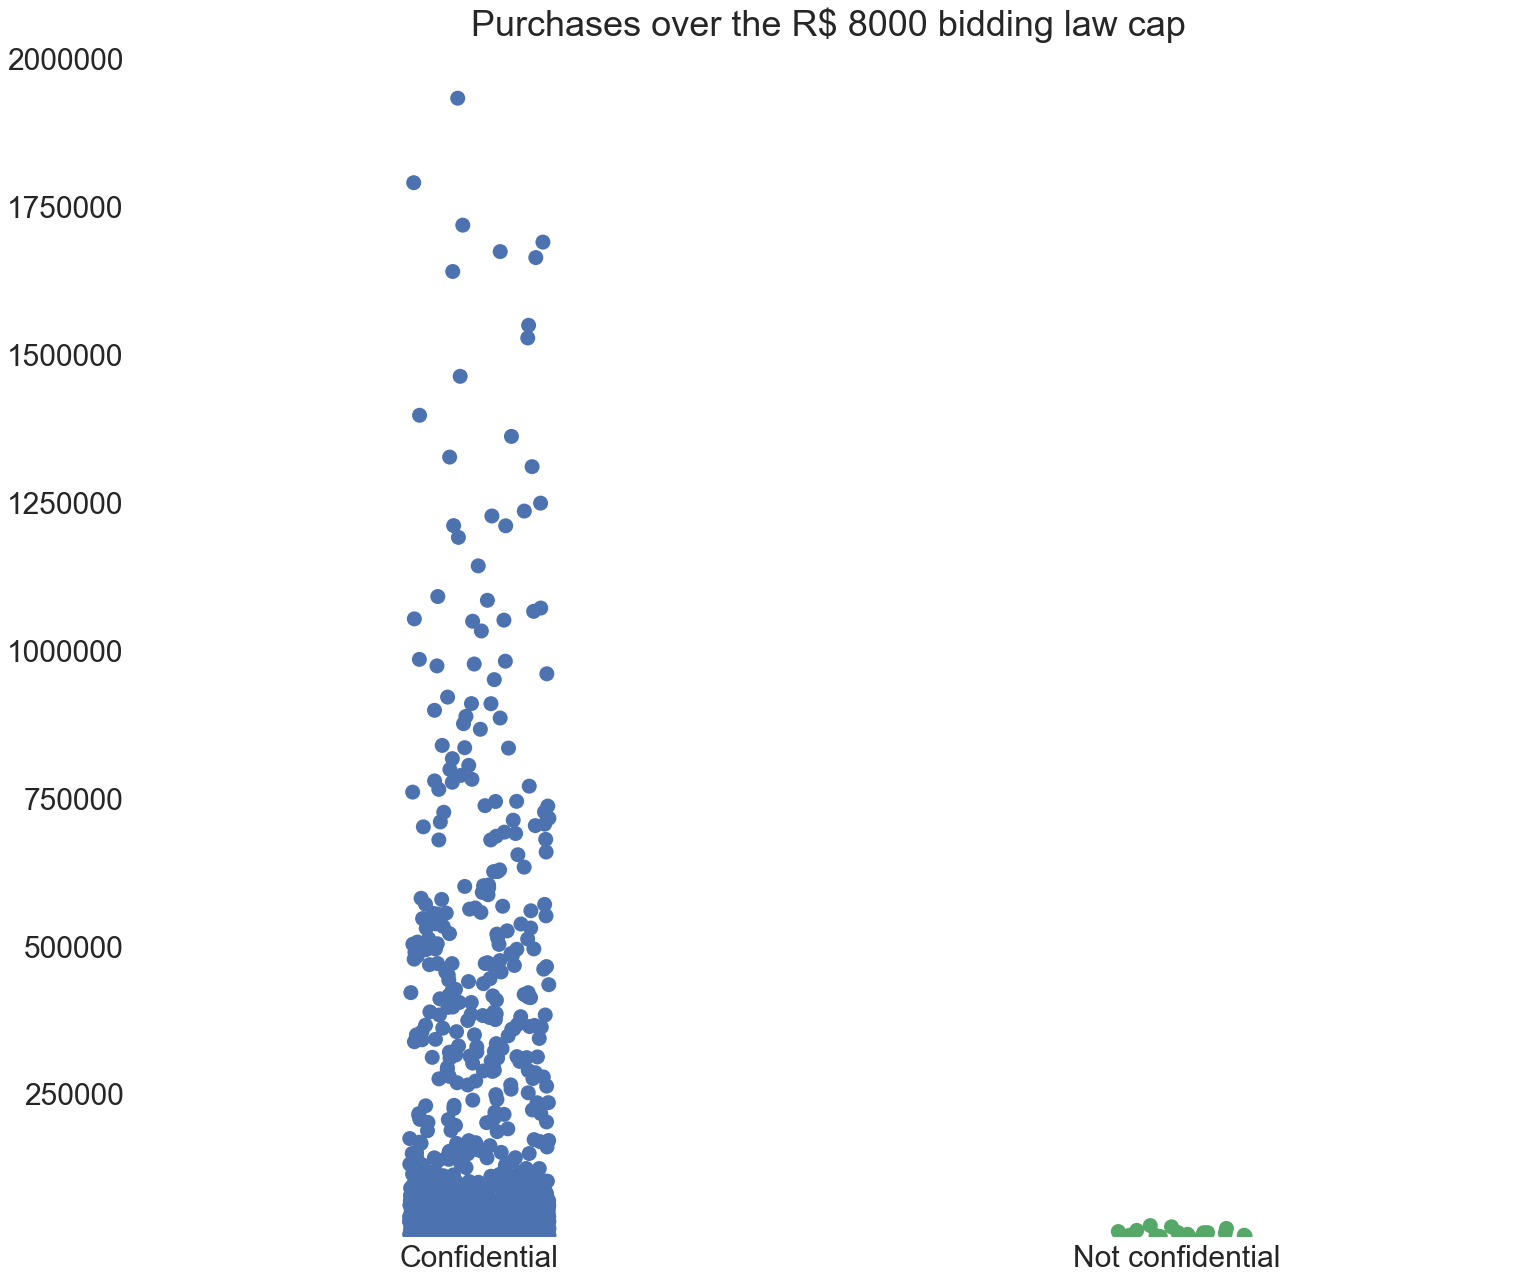

In [84]:
# And plotting in the same graph format
fig, ax = plt.subplots(figsize=(25,22))
sns.set(font_scale=3,style='white')
sns.stripplot('sigilo', 'Valor Transação', data=over_8000,size=15,jitter=True)
sns.despine(left=True, bottom=True, right=True)
ax.set_ylim(8000)
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title('Purchases over the R$ 8000 bidding law cap')
plt.savefig('sigilo.pdf')

In [ ]:
ax = over_8000['Valor Transação'].plot(kind='barh')